# 安裝套件模組

```
pip install pandas
pip install jieba
pip install GoogleNews
pip install matplotlib
pip install Pillow
pip install numpy
pip install scipy
pip install wordcloud
```

PYPI 對應套件簡介
- [GoogleNews](https://pypi.org/project/GoogleNews/)
- [jieba](https://pypi.org/project/jieba/)
- [wordcloud](https://pypi.org/project/wordcloud/)
- [matplotlib](https://pypi.org/project/matplotlib/)
- [PIL](https://pypi.org/project/Pillow/)
- [pandas](https://pypi.org/project/pandas/)
- [numpy](https://pypi.org/project/numpy/)
- [scipy](https://pypi.org/project/scipy/)



In [2]:
# 匯入模組
import pandas as pd
import jieba
from GoogleNews import GoogleNews
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


需要知道的觀念和套件：

1. Pandas 資料處理
2. GoogleNews 爬蟲套件
3. WordCloud 文字雲套件
4. Image.open 讀取圖片
5. numpy 陣列操作
6. jieba 斷詞套件
7. datetime 日期處理


# 初始化 Google News 物件

In [2]:
# Google News初始化設定
googlenews = GoogleNews(lang='zh-tw', region='TW', encode='utf-8')

# 啟用除錯模式 try except
googlenews.enableException(True)

In [15]:
object = GoogleNews()

print(object)
print(type(object))
print("object 可以使用的屬性跟方法")
print(dir(object))

<class 'GoogleNews.GoogleNews'>
object 可以使用的屬性跟方法
['_GoogleNews__encode', '_GoogleNews__end', '_GoogleNews__exception', '_GoogleNews__lang', '_GoogleNews__links', '_GoogleNews__period', '_GoogleNews__results', '_GoogleNews__section', '_GoogleNews__start', '_GoogleNews__texts', '_GoogleNews__topic', '_GoogleNews__totalcount', '_GoogleNews__version', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'build_response', 'clear', 'enableException', 'getVersion', 'get_links', 'get_news', 'get_page', 'get_texts', 'getpage', 'gettext', 'headers', 'page_at', 'remove_after_last_fullstop', 'result', 'results', 'search', 'setTimeRange', 'set_encode', 'set_lang', 'set_period', 'set_section', 'se

In [14]:
object.set_encode('utf-8')
print(object._GoogleNews__encode)
print(object.__dict__)

utf-8
{'_GoogleNews__texts': [], '_GoogleNews__links': [], '_GoogleNews__results': [], '_GoogleNews__totalcount': 0, 'user_agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0', '_GoogleNews__lang': 'en', 'headers': {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0'}, '_GoogleNews__period': '', '_GoogleNews__start': '', '_GoogleNews__end': '', '_GoogleNews__encode': 'utf-8', '_GoogleNews__exception': False, '_GoogleNews__version': '1.6.15', '_GoogleNews__topic': None, '_GoogleNews__section': None}


<GoogleNews.GoogleNews object at 0x123a83d70> 物件 記憶體位置

<class 'GoogleNews.GoogleNews'> 哪個類別 資料型態


{'_GoogleNews__texts': [], '_GoogleNews__links': [], '_GoogleNews__results': [], '_GoogleNews__totalcount': 0, 'user_agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0', '_GoogleNews__lang': 'en', 'headers': {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0'}, '_GoogleNews__period': '', '_GoogleNews__start': '', '_GoogleNews__end': '', '_GoogleNews__encode': 'utf-8', '_GoogleNews__exception': False, '_GoogleNews__version': '1.6.15', '_GoogleNews__topic': None, '_GoogleNews__section': None} 物件的屬性

_ 底線開頭的，類似私有屬性，不希望被外部直接訪問，用方法存取

物件的方法

build_response', 'clear', 'enableException', 'getVersion', 'get_links', 'get_news', 'get_page', 'get_texts', 'getpage', 'gettext', 'headers', 'page_at', 'remove_after_last_fullstop', 'result', 'results', 'search', 'setTimeRange', 'set_encode', 'set_lang', 'set_period', 'set_section', 'set_time_range', 'set_topic', 'setencode', 'setlang', 'setperiod', 'total_count', 'user_agent'


# 使用者輸入關鍵字

In [3]:
# , period='1d'
set_time = input("請輸入要搜尋的時間 (1d, 7d, 30d): ")
googlenews.set_period(set_time)
# 使用者輸入關鍵字
keyword = input("請輸入要搜尋的關鍵字: ")
# keyword = "柯文哲"
googlenews.search(keyword)

In [4]:
# test
result = googlenews.result()
print(f"標題: {result[0]['title']}")

標題: Google地圖改校名之亂 南市府：惡作劇者勿以身試法



# 顯示搜尋結果

In [5]:
# 獲取搜尋結果
result = googlenews.result()

# 顯示新聞標題和連結
for item in result:
    print(f"標題: {item['title']}")
    print(f"連結: {item['link']}")
    print('---')

標題: Google地圖改校名之亂 南市府：惡作劇者勿以身試法
連結: https://news.ltn.com.tw/news/Tainan/breakingnews/4804370&ved=2ahUKEwivqMnmjs6IAxVhiq8BHRACAeoQxfQBegQICBAC&usg=AOvVaw2FlumknT5VQWqOWpIJ3xgq
---
標題: 南市學校google地圖名稱遭惡搞 教育局呼籲惡作劇者勿以身試法
連結: https://tw.news.yahoo.com/%25E5%258D%2597%25E5%25B8%2582%25E5%25AD%25B8%25E6%25A0%25A1google%25E5%259C%25B0%25E5%259C%2596%25E5%2590%258D%25E7%25A8%25B1%25E9%2581%25AD%25E6%2583%25A1%25E6%2590%259E-%25E6%2595%2599%25E8%2582%25B2%25E5%25B1%2580%25E5%2591%25BC%25E7%25B1%25B2%25E6%2583%25A1%25E4%25BD%259C%25E5%258A%2587%25E8%2580%2585%25E5%258B%25BF%25E4%25BB%25A5%25E8%25BA%25AB%25E8%25A9%25A6%25E6%25B3%2595-034223226.html&ved=2ahUKEwivqMnmjs6IAxVhiq8BHRACAeoQxfQBegQICRAC&usg=AOvVaw1rKr87v7kY-Df9A76s9erS
---
標題: Google改名之亂！高職變「拔草學校」 彰化1校提告妨害名譽
連結: https://tw.news.yahoo.com/google%25E6%2594%25B9%25E5%2590%258D%25E4%25B9%258B%25E4%25BA%2582-%25E9%25AB%2598%25E8%2581%25B7%25E8%25AE%258A-%25E6%258B%2594%25E8%258D%2589%25E5%25AD%25B8%25E6%25A0%25A1-%25E5%25BD%25B0%25E5%258C%25

# 儲存成靜態文字檔案 Json 格式

In [6]:
# <!-- 儲存至 Json -->
import json
from datetime import datetime

# 獲取當前日期
today = datetime.now().strftime('%Y%m%d')

# 生成文件名
filename = f"./json_output/{today}_{keyword}_{set_time}.json"

# 將 result 寫入 JSON 文件
with open(filename, 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

print(f"搜尋結果已儲存為: {filename}")


搜尋結果已儲存為: ./json_output/20240919_校名_3d.json


In [7]:
# <!-- 讀取 Json檔案 -->

# 讀取 JSON 文件
with open(filename, 'r', encoding='utf-8') as f:
    loaded_result = json.load(f)

print(loaded_result)
print(type(loaded_result))


[{'title': 'Google地圖改校名之亂 南市府：惡作劇者勿以身試法', 'media': '自由時報', 'date': '4 分鐘前', 'datetime': nan, 'desc': '針對近日全國有多所學校（含大專院校、高中職、國中小）校名在Google地圖上的名稱被惡意修改成不雅字眼，南市教育局表示，昨（18）日一接獲通報後，立即由該局資訊中心介入...', 'link': 'https://news.ltn.com.tw/news/Tainan/breakingnews/4804370&ved=2ahUKEwivqMnmjs6IAxVhiq8BHRACAeoQxfQBegQICBAC&usg=AOvVaw2FlumknT5VQWqOWpIJ3xgq', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}, {'title': '南市學校google地圖名稱遭惡搞 教育局呼籲惡作劇者勿以身試法', 'media': 'Yahoo新聞', 'date': '3 分鐘前', 'datetime': nan, 'desc': '台南有多所學校在Google Maps頁面校名被惡意竄改，國立成功大學被改為「國立失敗大學」、台南市民德國民中學被改成「台南市立民沒品德國民中學」、台南市永康國民中學被...', 'link': 'https://tw.news.yahoo.com/%25E5%258D%2597%25E5%25B8%2582%25E5%25AD%25B8%25E6%25A0%25A1google%25E5%259C%25B0%25E5%259C%2596%25E5%2590%258D%25E7%25A8%25B1%25E9%2581%25AD%25E6%2583%25A1%25E6%2590%259E-%25E6%2595%2599%25E8%2582%25B2%25E5%25B1%2580%25E5%2591%25BC%25E7%25B1%25B2%25E6%2583%25A1%25E4%25BD%259C%25E5%258A%2587%25E8%2580%2585%25E5%258B%25BF%25E4%2

# 停用詞過濾

In [20]:
import re
import jieba.analyse

# 讀取停用詞
with open(r'./stopword.txt', 'r', encoding='utf-8') as file:
    stopword = file.read().splitlines() # BIF splitlines
    # print(stopword)

# 合併標題和描述，\n 是方便閱讀，可以不用加
all_content = ""
for item in loaded_result:
    all_content += item['title'] + "\n"
    if 'desc' in item:
        all_content += item['desc'] + "\n"
    all_content += "\n"

print("原始內容:")
print(all_content)

print("斷詞結果:")
seg_list = jieba.lcut(all_content)
print(seg_list)
print("--"*60)

# 預編譯正則表達式
english_pattern = re.compile(r'^[a-zA-Z]+$')

def is_english(text):
    return bool(english_pattern.match(text))

# 過濾停用詞和空白字符
filtered_words = []
for word in seg_list:
    # 去除詞的前後空白 跟上面產生的 \n
    cleaned_word = word.strip()
    # 檢查詞是否為空且不在停用詞列表中
    if cleaned_word and cleaned_word not in stopword and not is_english(cleaned_word):
        filtered_words.append(cleaned_word)

print('過濾後的結果: ')
print(" ".join(filtered_words))
print(len(filtered_words))
print("--"*60)

# 使用 jieba 提取關鍵詞
tags = jieba.analyse.extract_tags(" ".join(filtered_words), topK=150, withWeight=True)

# tf-idf 特殊演算法提取 關鍵詞

print("\n提取的關鍵詞:")
print("Tags type:", type(tags))
print("Tags content:", tags)

filtered_words = []
print("\n關鍵詞及其權重:")
for tag_tuple in tags:
    tag = tag_tuple[0]
    weight = tag_tuple[1]
    print(f"{tag}: {int(weight * 10000)}")
    filtered_words.append(tag)
print("權重過濾後的結果: ")
print(filtered_words)
print(len(filtered_words))
print("--"*60)

原始內容:
Google地圖改校名之亂 南市府：惡作劇者勿以身試法
針對近日全國有多所學校（含大專院校、高中職、國中小）校名在Google地圖上的名稱被惡意修改成不雅字眼，南市教育局表示，昨（18）日一接獲通報後，立即由該局資訊中心介入...

南市學校google地圖名稱遭惡搞 教育局呼籲惡作劇者勿以身試法
台南有多所學校在Google Maps頁面校名被惡意竄改，國立成功大學被改為「國立失敗大學」、台南市民德國民中學被改成「台南市立民沒品德國民中學」、台南市永康國民中學被...

Google改名之亂！高職變「拔草學校」 彰化1校提告妨害名譽
這幾日台灣各地掀起改校名之亂，有民眾匿名在Google地圖申請竄改學校名稱，造成各級學校陷入混亂，而這把火也延燒到台南，有不少高、國中被改成「監獄」、「低等」、「89猴...

彰化高中職校名遭惡搞！校方不忍了恐提告檢警出手調查| 社會
彰化有多名高中職近期在Google搜尋頁面上遭惡搞，其中精誠中學被改為「金城武高級中學」，員林農工則改為「農工職業殺手學校」，崇實高工改為「蟲蝕高工」等，...

成功大學變失敗大學？Google地圖多校遭惡搞被改名 南市警方說話了
台南有多所學校在Google Maps頁面校名被惡意竄改，國立成功大學被改為「國立失敗大學」、台南市民德國民中學被改成「...

Google地圖校名遭惡搞 台南民代怒：低級當有趣 警方出手了
近日全台多所學校校名在Google Maps頁面遭惡意竄改，台南多所學校受害，國立成功大學被改為「國立失敗大學」、民德國民中學被改成「台南市立民沒品德國民中學」、永康...

多校Google地圖校名遭竄改惡搞 南市議員蔡筱薇：錯把低級當有趣
對於台南有多所學校在網路Google Maps頁面校名被竄改惡搞，成功大學遭改為「國立失敗大學」、民德國中被改成「台南市立民沒品德國中」、永康國中被改成「台南市永康國民...

Google遭竄改校名延燒 台中多所高中遭惡搞怒蒐證提告
近來全台多所學校名稱在Google頁面遭竄改，台中亦有不少學校受害，如有的變成、「台中新社高級監獄」、「麥當來高級中學」、「台中市立沙鹿工業高級猴子學校」、「台中...

Google地圖台南多數校名遭濫改 市議員蔡筱薇：錯把低級當有趣
【視傳媒記者/黃雋淮臺南報導】. 台南有多所學校在Google


   - `^` 表示字符串的開始
   - `[a-zA-Z]` 表示任何英文字母（大寫或小寫）
   - `+` 表示前面的字符至少出現一次
   - `$` 表示字符串的結束
   -  `.*`：匹配任意字符（除換行符外）零次或多次

# 計算文字出現次數

In [21]:
# 使用 BIF Counter 計算詞頻
word_count = Counter(filtered_words)
print(word_count)
print(type(word_count))
print(dir(word_count))

print("--"*60)

print("word_count.items():")
print(word_count.items())
print(type(word_count.items()))

print("--"*60)

# 將 word_count 轉換為 dict
word_count_dict = dict(word_count)

# 欸？ counter 轉 dict 後，key 的順序改變了
from collections import OrderedDict
word_count_dict = OrderedDict(word_count.most_common())

print("word_count_dict:")
print(word_count_dict)
print(type(word_count_dict))
print(f"字典數量: {len(word_count_dict)}")
print("--"*60)

 

Counter({'校名': 1, '學校': 1, '國立': 1, '大學': 1, '台南市': 1, '地圖': 1, '改為': 1, '台南': 1, '多所': 1, '國民中學': 1, '遭惡': 1, '頁面': 1, '失敗': 1, '民德': 1, '惡意': 1, '改成': 1, '南市': 1, '立民': 1, '國中': 1, '監獄': 1, '高級': 1, '高中': 1, '永康': 1, '品德': 1, '之亂': 1, '低級當': 1, '彰化': 1, '成功': 1, '高工': 1, '惡作': 1, '劇者': 1, '試法': 1, '名稱': 1, '延燒': 1, '搜尋頁': 1, '中學': 1, '多校': 1, '說話': 1, '遭竄': 1, '改惡': 1, '蔡筱薇': 1, '咒術': 1, '港明': 1, '北門': 1, '有趣': 1, '警方': 1, '以身': 1, '受害': 1, '教育局': 1, '出手': 1, '改名': 1, '金城武': 1, '沙鹿': 1, '西港': 1, '針對': 1, '全國': 1, '含大專': 1, '成不雅': 1, '18': 1, '日一接': 1, '獲通報': 1, '由該': 1, '局資訊': 1, '呼籲': 1, '高職變': 1, '校提告': 1, '名譽': 1, '這幾日': 1, '台灣': 1, '有民眾': 1, '申請': 1, '改學': 1, '各級': 1, '混亂': 1, '這把': 1, '89': 1, '提告': 1, '檢警': 1, '調查': 1, '社會': 1, '精誠中學': 1, '員林': 1, '農工則': 1, '農工': 1, '職業': 1, '手學校': 1, '崇實': 1, '蟲蝕': 1, '大學變': 1, '民代怒': 1, '遭惡意': 1, '議員': 1, '網路': 1, '國民': 1, '證提告': 1, '近來': 1, '變成': 1, '麥當來': 1, '工業': 1, '多數': 1, '遭濫': 1, '市議員': 1, '視傳': 1, '媒記者': 1, '報導': 1, '高專': 1, '佳里區': 1,

# 從字典取出資料

字典可以使用的方法
['clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 

'pop', 'popitem', 'setdefault', 'update', 'values']


In [10]:
# print(dir(word_count_dict))
# print(word_count_dict.items())
# print(type(word_count_dict.items()))
# print(word_count_dict.keys())
# words = list(word_count_dict.keys())
# counts = list(word_count_dict.values())

# items ===> 同時取出 key 和 value 就可以直接加入 dataframe

words = []
counts = []

print("--"*60)

for key in word_count_dict:
    print(key, word_count_dict[key])
    words.append(key)
    counts.append(word_count_dict[key])

# words = [key for key in word_count_dict]
# counts = [word_count_dict[key] for key in word_count_dict]

print(words)
print(counts)

print("--"*60)

------------------------------------------------------------------------------------------------------------------------
校名 1
學校 1
國立 1
大學 1
台南市 1
地圖 1
改為 1
台南 1
多所 1
國民中學 1
遭惡 1
頁面 1
失敗 1
民德 1
惡意 1
改成 1
南市 1
立民 1
國中 1
監獄 1
高級 1
高中 1
永康 1
品德 1
之亂 1
低級當 1
彰化 1
成功 1
高工 1
惡作 1
劇者 1
試法 1
名稱 1
延燒 1
搜尋頁 1
中學 1
多校 1
說話 1
遭竄 1
改惡 1
蔡筱薇 1
咒術 1
港明 1
北門 1
有趣 1
警方 1
以身 1
受害 1
教育局 1
出手 1
['校名', '學校', '國立', '大學', '台南市', '地圖', '改為', '台南', '多所', '國民中學', '遭惡', '頁面', '失敗', '民德', '惡意', '改成', '南市', '立民', '國中', '監獄', '高級', '高中', '永康', '品德', '之亂', '低級當', '彰化', '成功', '高工', '惡作', '劇者', '試法', '名稱', '延燒', '搜尋頁', '中學', '多校', '說話', '遭竄', '改惡', '蔡筱薇', '咒術', '港明', '北門', '有趣', '警方', '以身', '受害', '教育局', '出手']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
------------------------------------------------------------------------------------------------------------------------


# 使用 Pandas 排序呈現資料

練習用 Series 方式加入


In [11]:
# 創建一個 pandas Series，使用單字作為索引，詞頻作為值
word_count_series = pd.Series(data=counts, index=words, name='一維陣列詞頻Series')
print(word_count_series.info())
print(word_count_series.head)
print("--"*60)

<class 'pandas.core.series.Series'>
Index: 50 entries, 校名 to 出手
Series name: 一維陣列詞頻Series
Non-Null Count  Dtype
--------------  -----
50 non-null     int64
dtypes: int64(1)
memory usage: 800.0+ bytes
None
<bound method NDFrame.head of 校名      1
學校      1
國立      1
大學      1
台南市     1
地圖      1
改為      1
台南      1
多所      1
國民中學    1
遭惡      1
頁面      1
失敗      1
民德      1
惡意      1
改成      1
南市      1
立民      1
國中      1
監獄      1
高級      1
高中      1
永康      1
品德      1
之亂      1
低級當     1
彰化      1
成功      1
高工      1
惡作      1
劇者      1
試法      1
名稱      1
延燒      1
搜尋頁     1
中學      1
多校      1
說話      1
遭竄      1
改惡      1
蔡筱薇     1
咒術      1
港明      1
北門      1
有趣      1
警方      1
以身      1
受害      1
教育局     1
出手      1
Name: 一維陣列詞頻Series, dtype: int64>
------------------------------------------------------------------------------------------------------------------------


In [12]:
word_text_series = pd.Series(data=words, name='一維陣列文字Series')
print(word_text_series.info())

print("--"*60)
print(word_text_series.head())

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: 一維陣列文字Series
Non-Null Count  Dtype 
--------------  ----- 
50 non-null     object
dtypes: object(1)
memory usage: 532.0+ bytes
None
------------------------------------------------------------------------------------------------------------------------
<bound method NDFrame.head of 0       校名
1       學校
2       國立
3       大學
4      台南市
5       地圖
6       改為
7       台南
8       多所
9     國民中學
10      遭惡
11      頁面
12      失敗
13      民德
14      惡意
15      改成
16      南市
17      立民
18      國中
19      監獄
20      高級
21      高中
22      永康
23      品德
24      之亂
25     低級當
26      彰化
27      成功
28      高工
29      惡作
30      劇者
31      試法
32      名稱
33      延燒
34     搜尋頁
35      中學
36      多校
37      說話
38      遭竄
39      改惡
40     蔡筱薇
41      咒術
42      港明
43      北門
44      有趣
45      警方
46      以身
47      受害
48     教育局
49      出手
Name: 一維陣列文字Series, dtype: object>


In [13]:
# 將單一 Series 轉換為 DataFrame
df = word_count_series.reset_index()
df.columns = ['word', 'count']  # 重命名列
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    50 non-null     object
 1   count   50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes
None
<bound method NDFrame.head of     word  count
0     校名      1
1     學校      1
2     國立      1
3     大學      1
4    台南市      1
5     地圖      1
6     改為      1
7     台南      1
8     多所      1
9   國民中學      1
10    遭惡      1
11    頁面      1
12    失敗      1
13    民德      1
14    惡意      1
15    改成      1
16    南市      1
17    立民      1
18    國中      1
19    監獄      1
20    高級      1
21    高中      1
22    永康      1
23    品德      1
24    之亂      1
25   低級當      1
26    彰化      1
27    成功      1
28    高工      1
29    惡作      1
30    劇者      1
31    試法      1
32    名稱      1
33    延燒      1
34   搜尋頁      1
35    中學      1
36    多校      1
37    說話      1
38    遭竄      1
39    改惡      1
40   蔡筱薇

In [14]:
# 將多個 Series 轉換為 DataFrame

# 重置兩個 Series 的索引
word_text_series = word_text_series.reset_index(drop=True)
word_count_series = word_count_series.reset_index(drop=True)

# 使用 concat 創建 DataFrame
df = pd.concat([word_text_series, word_count_series], axis=1)

# 重命名列
df.columns = ['word', 'count']

# 顯示 DataFrame 的資訊
print(df.info())

# 顯示 DataFrame 的前幾行
print("DataFrame 預覽：")
print(df.head())

# # 如果需要，可以按計數降序排序
# df_sorted = df.sort_values('count', ascending=False).reset_index(drop=True)

# # 顯示排序後的 DataFrame 前幾行
# print("\n排序後：")
# print(df_sorted.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    50 non-null     object
 1   count   50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes
None

DataFrame 預覽：
  word  count
0   校名      1
1   學校      1
2   國立      1
3   大學      1
4  台南市      1


In [15]:
# 將字典轉 list 放入 DataFrame
df2 = pd.DataFrame(list(word_count_dict.items()), columns=['word', 'count'])


# df_sorted_org = df.sort_values(by='count', ascending=False)
df_sorted = df2.sort_values(by='count', ascending=False).reset_index(drop=True)

print("df2:")
print(df2)
print("--"*60)
print("\ndf_sorted 資料結構:")
print(df_sorted.info())
print("\ndf_sorted:")
print(df_sorted.head)
print("\ndf_sorted 索引:")
print(df_sorted.index)


df2:
    word  count
0     校名      1
1     學校      1
2     國立      1
3     大學      1
4    台南市      1
5     地圖      1
6     改為      1
7     台南      1
8     多所      1
9   國民中學      1
10    遭惡      1
11    頁面      1
12    失敗      1
13    民德      1
14    惡意      1
15    改成      1
16    南市      1
17    立民      1
18    國中      1
19    監獄      1
20    高級      1
21    高中      1
22    永康      1
23    品德      1
24    之亂      1
25   低級當      1
26    彰化      1
27    成功      1
28    高工      1
29    惡作      1
30    劇者      1
31    試法      1
32    名稱      1
33    延燒      1
34   搜尋頁      1
35    中學      1
36    多校      1
37    說話      1
38    遭竄      1
39    改惡      1
40   蔡筱薇      1
41    咒術      1
42    港明      1
43    北門      1
44    有趣      1
45    警方      1
46    以身      1
47    受害      1
48   教育局      1
49    出手      1
------------------------------------------------------------------------------------------------------------------------

df_sorted 資料結構:
<class 'pandas.core.frame.DataFrame'>
Ran

# 製作文字雲圖片遮罩

/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf
(540, 960)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


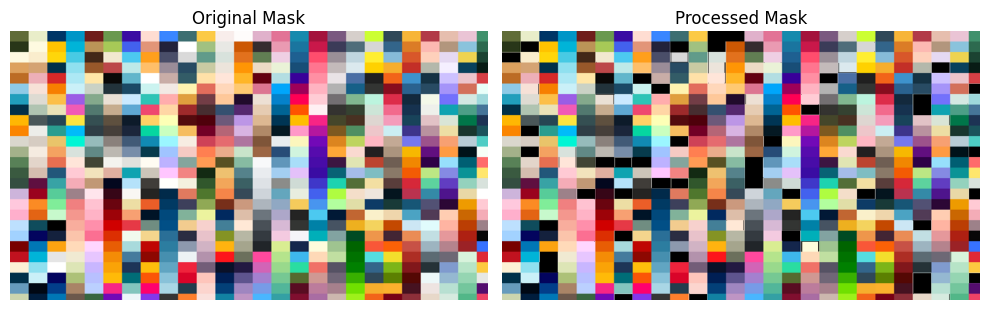

原始x色像素數量：763，總像素數：1555200（佔比：0.05%）
處理後x色像素數量：31920，總像素數：1555200（佔比：2.05%）


In [22]:
# 正常圖片版本

# from PIL import ImageOps # 反轉黑白
# ImageOps.invert()

# 詢問使用者字體檔案路徑
# font_path_input = input("請輸入中文字體的檔案路徑: ")
font_path_input = "/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf"
print(font_path_input)

# 文字雲圖片遮罩檔案路徑
img_path = "./Mask_Image/Square_mask.png"


mask_color = np.array((Image.open(img_path).convert("RGB")).resize((960, 540)))

total_pixels = mask_color.size
# total_pixels = mask_image.shape[0] * mask_image.shape[1]

org_filtered_pixels = np.sum(np.all(mask_color == 0, axis=2))

mask_image = mask_color.copy()

threshold = 220 # 根據圖片調整閾值
mask_image[np.all(mask_image > threshold, axis=2)] = 0
# 只要是（偏）()色區域，都設為()色
filtered_pixels = np.sum(np.all(mask_image == 0, axis=2))

# 邊緣檢測 (進階用法，此部分為當初課堂老師提供)
# 我的理解：將三個顏色通道做了某個處理，然後將三個通道的結果累加，最後除以 3 得到平均值
edges = np.mean([gaussian_gradient_magnitude(mask_image[:, :, i] / 255., 2) for i in range(3)], axis=0)
print(edges.shape)
print(edges)
# 使用平均值作為閾值
threshold = edges.mean() * 30
mask_image[edges > threshold] = 255


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# 顯示原始遮罩圖片
ax1.imshow(mask_color)
ax1.set_title("Original Mask")
ax1.axis('off')

# 顯示處理後的遮罩圖片
ax2.imshow(mask_image)
ax2.set_title("Processed Mask")
ax2.axis('off')

plt.tight_layout()
plt.show()




print(f"原始x色像素數量：{org_filtered_pixels}，總像素數：{total_pixels}（佔比：{org_filtered_pixels/total_pixels*100:.2f}%）")
print(f"處理後x色像素數量：{filtered_pixels}，總像素數：{total_pixels}（佔比：{filtered_pixels/total_pixels*100:.2f}%）")

# 將高於閾值的邊緣像素設為白色

# 顏色生成
# image_colors = ImageColorGenerator(mask_image)
# image_colors.default_color = [0.9,0.9,0.9]


/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf
Type of mask_color: <class 'numpy.ndarray'>
Shape of mask_color: (540, 960)
Data type of mask_color: uint8


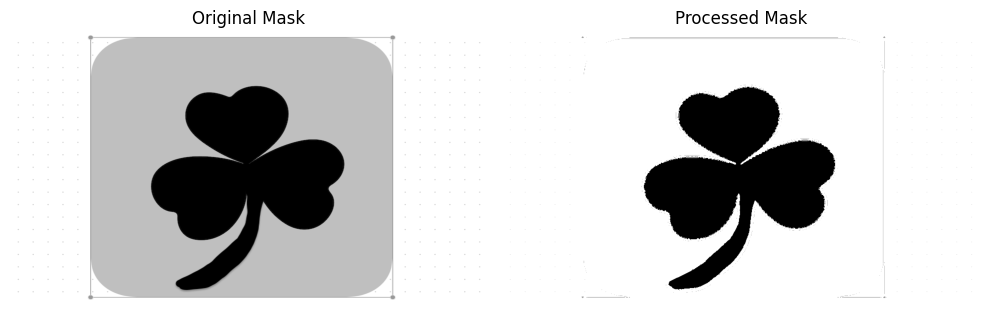

原始x色像素數量：198232，總像素數：518400（佔比：38.24%）
處理後x色像素數量：438115，總像素數：518400（佔比：84.51%）


In [19]:
# 選擇黑色遮罩圖案練習處理圖片

# from PIL import ImageOps # 反轉黑白
# ImageOps.invert()

# 詢問使用者字體檔案路徑
# font_path_input = input("請輸入中文字體的檔案路徑: ")
font_path_input = "/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf"
print(font_path_input)
# 文字雲圖片遮罩檔案路徑
img_path = "./Mask_Image/LeafDrak_mask.png"

# 讀取遮罩圖片，轉換為 RGB，調整大小，然後轉換為 numpy 陣列
# mask_color = np.array(Image.open(img_path).convert("RGB").resize((960, 540)))

# 轉灰階
mask_color = np.array((Image.open(img_path).convert("L")).resize((960, 540)))
# 查看 mask_color 的類型和屬性
print("Type of mask_color:", type(mask_color))
print("Shape of mask_color:", mask_color.shape)
print("Data type of mask_color:", mask_color.dtype)
# print("Attributes and methods of array:", dir(mask_color))
total_pixels = mask_color.size
# org_filtered_pixels = np.sum(np.all(mask_image == 255, axis=2))
org_pixels = np.sum(mask_color == 255)

# 縮小
# # 每隔 n 個像素取一個像素
# # mask_color = mask_color[::4, ::4]

# # 放大（重複像素）
# mask_color_large = np.repeat(np.repeat(mask_color, 4, axis=0), 4, axis=1)

# 進行二次處理，保留灰階
mask_image = mask_color.copy()
# 不使用模組，numpy 反轉處理方式
# mask_image = 255 - mask_color
# 去噪應用
threshold1 = 190# 根據圖片調整閾值
threshold2 = 20
# mask_image[np.all(mask_image < threshold, axis=2)] = 255
mask_image[mask_image < threshold2] = 0
mask_image[mask_image > threshold1] = 255

# 只要是（偏）()色區域，都設為()色

# 高級用法，感謝 GPT 的解釋，真的是很厲害的做法....
# 0-255 變成 0-1 的數據，然後把 某個閾值以上的數據變成 1，剩下的變成 0
# 然後再次合成上去

# 對灰階圖像進行邊緣檢測

edges = gaussian_gradient_magnitude(mask_image, sigma=0.4)
# 設置邊緣閾值
edge_threshold = edges.mean()

# 創建邊緣遮罩 True 為 1，False 為 0 ---> 1 就變成 255 白色
edge_mask = (edges > edge_threshold).astype(np.uint8) * 255

# 將邊緣與原始遮罩結合
mask_image = np.maximum(mask_image, edge_mask)


# 邊緣檢測 (進階用法，此部分為當初課堂老師提供，學完 numpy 後，可以更了解這個做法)

# 我的理解：將三個顏色通道做了某個處理，然後將三個通道的結果累加，最後除以 3 得到平均值
# edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i] / 255., 2) for i in range(3)], axis=0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# 顯示原始遮罩圖片
ax1.imshow(mask_color, cmap='gray')
ax1.set_title("Original Mask")
ax1.axis('off')

# 顯示處理後的遮罩圖片
ax2.imshow(mask_image, cmap='gray')
ax2.set_title("Processed Mask")
ax2.axis('off')

plt.tight_layout()
plt.show()



# filtered_pixels = np.sum(np.all(mask_image == 255, axis=2))
filtered_pixels = np.sum(mask_image == 255)
# total_pixels = mask_image.shape[0] * mask_image.shape[1]


print(f"原始x色像素數量：{org_pixels}，總像素數：{total_pixels}（佔比：{org_pixels/total_pixels*100:.2f}%）")
print(f"處理後x色像素數量：{filtered_pixels}，總像素數：{total_pixels}（佔比：{filtered_pixels/total_pixels*100:.2f}%）")

# 將高於閾值的邊緣像素設為白色

# 顏色生成
# image_colors = ImageColorGenerator(mask_image)
# image_colors.default_color = [0.9,0.9,0.9]


"""

AI 回覆的內容，關於邊緣檢測：

這個版本的代碼做了以下事情：

1. 創建一個與單個顏色通道相同大小的零矩陣。
2. 遍歷三個顏色通道（RGB）。
3. 對每個通道計算高斯梯度幅值。
4. 將每個通道的梯度累加到 `edges` 矩陣中。
5. 最後，將累加的結果除以 3 來獲得平均值。

這個方法實現了與原始代碼相同的功能，但避免了使用列表推導式和 `np.mean` 的 `axis` 參數，可能更容易理解每一步在做什麼。最後，仍然將高於閾值的邊緣像素設為白色，以在遮罩中突出顯示邊緣。


- 高斯梯度幅值越低 → 越可能是平滑區域（非邊緣）

- 高斯梯度幅值越高 → 越可能是邊緣

我：邊緣設為白色不就是不明顯了嗎？

您提出了一個很好的觀察。讓我解釋一下這個看似矛盾的做法的原因：

1. 在生成詞雲的上下文中，白色（255）通常代表可以放置文字的區域。

2. 將邊緣設為白色的目的不是為了在最終的詞雲中使邊緣更明顯，而是為了指導詞雲生成算法在哪裡可以放置文字。

3. 通過將邊緣設為白色，我們實際上是告訴詞雲生成器："這些是圖像的重要特徵，你可以在這些地方放置文字"。

4. 這樣做的結果是，文字會傾向於沿著原始圖像的輪廓和主要特徵分布，而不是隨機分布或覆蓋重要的視覺元素。

5. 在最終的詞雲中，這些邊緣不會直接可見，但它們會影響文字的排列方式，使得詞雲的整體形狀能夠反映原始圖像的輪廓。

所以，雖然在遮罩圖像中邊緣被設為白色看起來不明顯，但這實際上是為了在生成詞雲時保留原始圖像的結構和形狀。最終的效果是，生成的詞雲會呈現出原始圖像的大致輪廓，而不是完全忽視圖像的特徵。

如果您想要在最終的詞雲中使邊緣更加明顯，可以考慮相反的方法：將邊緣設為黑色或其他深色，這樣詞雲生成器就會避免在這些區域放置文字，從而在視覺上保留原始圖像的輪廓。

"""

AI 回覆，關於 Pillow 的 Mode 參數


1. "L" (Luminance) 模式：
   - 每個像素用 0 到 255 的整數值表示，其中 0 是黑色，255 是白色。
2. "RGB" (Red, Green, Blue) 模式：
3. "RGBA" (Red, Green, Blue, Alpha) 模式：
4. "1" (1-bit pixels, black and white) 模式：
   - 每個像素只能是 0（黑）或 1（白）。

<!-- 使用 Python Teseeract OCR OpenCV 模組處理圖片，有用過 -->

In [18]:
# 因為轉灰階變成二維，再轉回去三維
print(mask_image.shape)
if len(mask_image.shape) == 2:
    mask_image = np.stack((mask_image) * 3, axis=-1)
    print(mask_image.shape)
    print(mask_image)

(540, 960)
(960, 540)
[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


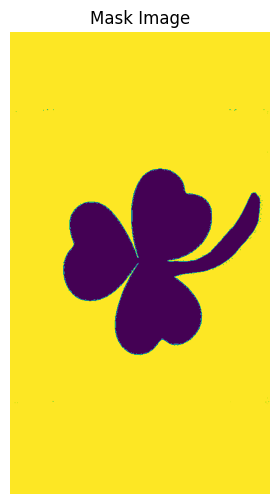

Mask shape: (960, 540)
Mask dtype: uint8
Mask min value: 0
Mask max value: 253


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

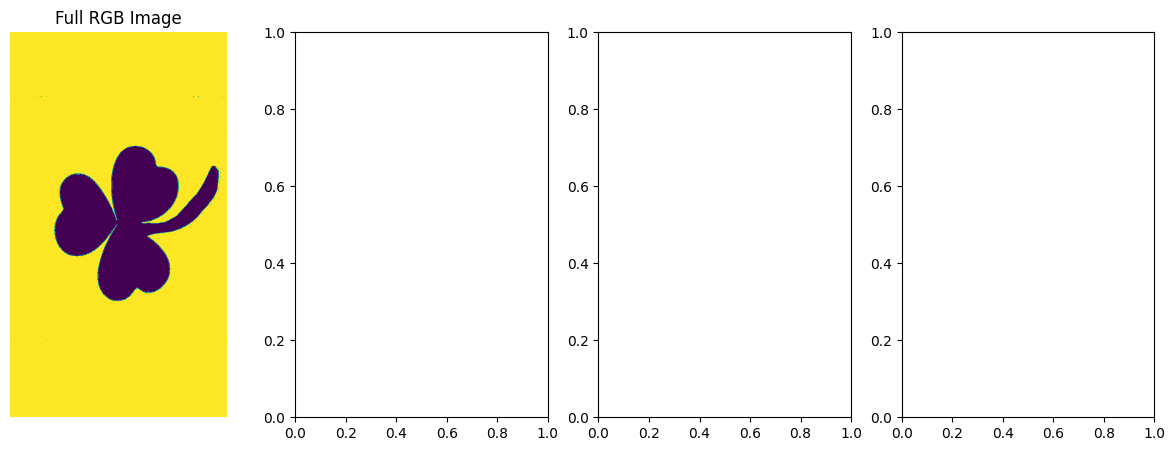

In [19]:
import matplotlib.pyplot as plt

# 檢查轉換後的遮罩圖片
plt.figure(figsize=(10, 6))
plt.imshow(mask_image)  # 使用灰度顏色映射
plt.title("Mask Image")
plt.axis('off')
plt.show()

# 打印遮罩圖片的形狀和一些基本統計信息
print("Mask shape:", mask_image.shape)
print("Mask dtype:", mask_image.dtype)
print("Mask min value:", mask_image.min())
print("Mask max value:", mask_image.max())

# 如果需要查看 RGB 通道
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
# 顯示完整的 RGB 圖像
ax1.imshow(mask_image)
ax1.set_title('Full RGB Image')
ax1.axis('off')

# 顯示紅色通道
ax2.imshow(mask_image[:,:,0], cmap='Reds')
ax2.set_title('Red Channel')
ax2.axis('off')

# 顯示綠色通道
ax3.imshow(mask_image[:,:,1], cmap='Greens')
ax3.set_title('Green Channel')
ax3.axis('off')

# 顯示藍色通道
ax4.imshow(mask_image[:,:,2], cmap='Blues')
ax4.set_title('Blue Channel')
ax4.axis('off')

plt.tight_layout()
plt.show()

# 生成文字雲

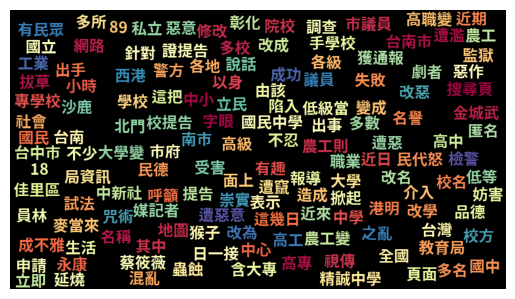

文字雲圖片已儲存為: ./img/20240919_校名_title+desc_relative_scaling99%.png


In [27]:
# 生成文字雲

# wordcloud = WordCloud(font_path=font_path_input, width=320, height=320,max_font_size=50,max_words=4000,color_func=image_colors).generate_from_frequencies(word_count)
wordcloud = WordCloud(
    font_path=font_path_input,
    width=960,  # 增加寬度以提高畫質
    height=540,  # 增加高度以提高畫質
    mask=mask_image,
    max_font_size=30,  # 增加最大字體大小
    max_words=400,
    # color_func=image_colors,
    prefer_horizontal=0.99,  # 90% 的詞水平放置
    scale=1,  # 增加縮放比例以提高畫質
    min_font_size=5,  # 設置最小字體大小
    background_color="black",  # 設置背景顏色
    mode="RGB",
    relative_scaling=0.99,  # 平衡詞頻和詞排名的重要性
    collocations=True,  # 包含常見詞組
    colormap="Spectral",
    contour_width=1,  # 添加輪廓以增強視覺效果
    contour_color="black"# 設置輪廓顏色
).generate_from_frequencies(word_count_dict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# 儲存文字雲圖片 檔案名稱格式化
today = datetime.now().strftime('%Y%m%d')
image_filename = f"./img/{today}_{keyword}_title+desc_relative_scaling99%.png"
wordcloud.to_file(image_filename)
print(f"文字雲圖片已儲存為: {image_filename}")

## WordCloud 參數釐清

AI 回覆的內容，關於參數說明：

您提出了一個很好的問題，這確實需要進一步澄清。您是對的，排名通常是基於詞頻的，但它們在詞雲生成中的作用略有不同。讓我解釋得更清楚：

1. 排名 vs 詞頻：
   - 排名：詞的相對位置（第1常見、第2常見等）
   - 詞頻：詞出現的實際次數

2. 差異的重要性：
   - 排名只反映相對順序，不顯示頻率差距
   - 詞頻反映實際出現次數，顯示詞與詞之間的差距

3. 舉例說明：
   假設有三個詞：
   - A：出現100次（排名1）
   - B：出現99次（排名2）
   - C：出現10次（排名3）

   - 純基於排名（0.0）：A、B、C的大小差異很小
   - 純基於詞頻（1.0）：A和B幾乎一樣大，C明顯小得多

4. `relative_scaling` 的作用：
   - 0.0：主要考慮排名，A、B、C大小差異不大
   - 1.0：完全按詞頻，A、B很大且相近，C很小
   - 0.5：平衡兩者，反映排名，也部分反映頻率差異

所以，雖然排名確實基於詞頻，但 `relative_scaling` 參數允許您決定是更注重詞的相對順序（排名），還是更注重詞之間的實際頻率差異。這提供了在視覺呈現上的靈活性。

# 其他資訊確認

In [ ]:
import os

print("Current working directory:", os.getcwd())
print("Font file exists:", os.path.exists(font_path_input))

(2024/09/17更新)

- `get_news()` 函數目前返回的是 Google 頁面轉址連結
- 參考 [SuYenTing/Python-web-crawler](https://github.com/SuYenTing/Python-web-crawler/blob/main/google_real_time_news.py) 專案，使用 google-news-url-decoder 模組解決轉址問題
- `search()` 函數可以獲取真正的新聞網址
- 非英文語言搜尋時，無法返回正確的 datetime 時間格式